In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import seaborn as sns
import wandb

In [ ]:
api = wandb.Api()
run = api.run("/varadi-epfl/sub-n-grams/runs/na7x2hu5")

h = run.scan_history(keys=["loss", "grad_norm", "A_layer0_head1_norm", "A_layer0_head0_norm", "QK_norm", "step", "bayes", "unigram", "bigram", "trigram"])
# print(type(h))

In [24]:
h = run.history()
print(type(h))

<class 'pandas.core.frame.DataFrame'>


In [19]:
print(run.summary)

{'A': {'_type': 'image-file', 'format': 'png', 'height': 513, 'path': 'media/images/A_12277_75c537e2ba5fc51aece0.png', 'sha256': '75c537e2ba5fc51aece087715f9ed4c742f586e19d0958f35e44065fdbc49e7c', 'size': 9273, 'width': 516}, 'A1/head_0': {'_type': 'image-file', 'format': 'png', 'height': 482, 'path': 'media/images/A1/head_0_12240_38be8e234c87c06e9857.png', 'sha256': '38be8e234c87c06e98570af918b1798ce26c0508d497ed55c6be8b19762532f4', 'size': 26662, 'width': 481}, 'A1/head_1': {'_type': 'image-file', 'format': 'png', 'height': 482, 'path': 'media/images/A1/head_1_12240_888482f287b3d2e09c24.png', 'sha256': '888482f287b3d2e09c24519a917471037b8a75599e0e17bce489dbc54105c9ae', 'size': 22694, 'width': 481}, 'A2/': {'_type': 'image-file', 'format': 'png', 'height': 482, 'path': 'media/images/A2/_12240_ce0b6cf0871f0f0b2051.png', 'sha256': 'ce0b6cf0871f0f0b20514b869486ca3e0817465bac17e9b731ebe62a811ea3b9', 'size': 3216, 'width': 481}, 'A_layer0_head0_norm': 215.2986602783203, 'A_layer0_head1_nor

In [3]:
ungiram = run.summary["unigram"]
bigram = run.summary["bigram"]
trigram = run.summary["trigram"]
bayes = run.summary["bayes"]

In [4]:
losses = [row["loss"] for row in h]
bayes = [row["bayes"] for row in h]
unigram = [row["unigram"] for row in h]
bigram = [row["bigram"] for row in h]
trigram = [row["trigram"] for row in h]


In [28]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))

def plot_losses(
    test_losses,
    bayes,
    save_every,
    fontsize=20,
    unigram=None,
    bigram=None,
    trigram=None,
):
    fig = plt.figure(figsize=(12, 6))
    plt.plot(jnp.arange(len(test_losses)) * save_every, jnp.array(test_losses), c=colors[0], linewidth=5 )

    if unigram is not None:
        plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
    if bigram is not None:
        plt.axhline(bigram[0], c=colors[5], ls="--", label="Bigram", linewidth=3 )
    if trigram is not None:
        plt.axhline(trigram[0], c=colors[4], ls="--", label="Trigram", linewidth=3 )
        plt.axhline(bayes[0], c=colors[3], ls="--", label="4-gram", linewidth=3 )
    else:
        plt.axhline(bayes, c=colors[3], ls="--", label="Trigram", linewidth=3 )

    plt.plot(jnp.arange(len(test_losses)) * save_every, jnp.array(test_losses), c=colors[0], linewidth=5 )


    plt.legend(fontsize=fontsize * 0.8, loc = (0.8,0.6))
    sns.despine()
    plt.xlabel("Step", fontsize=fontsize)
    plt.ylabel("Test Loss", fontsize=fontsize)
    plt.xlim(-10, 600)
    plt.yticks(fontsize=fontsize * 0.8)
    plt.xticks(fontsize=fontsize * 0.8)
    plt.savefig("loss1.pdf", bbox_inches="tight")
    return fig

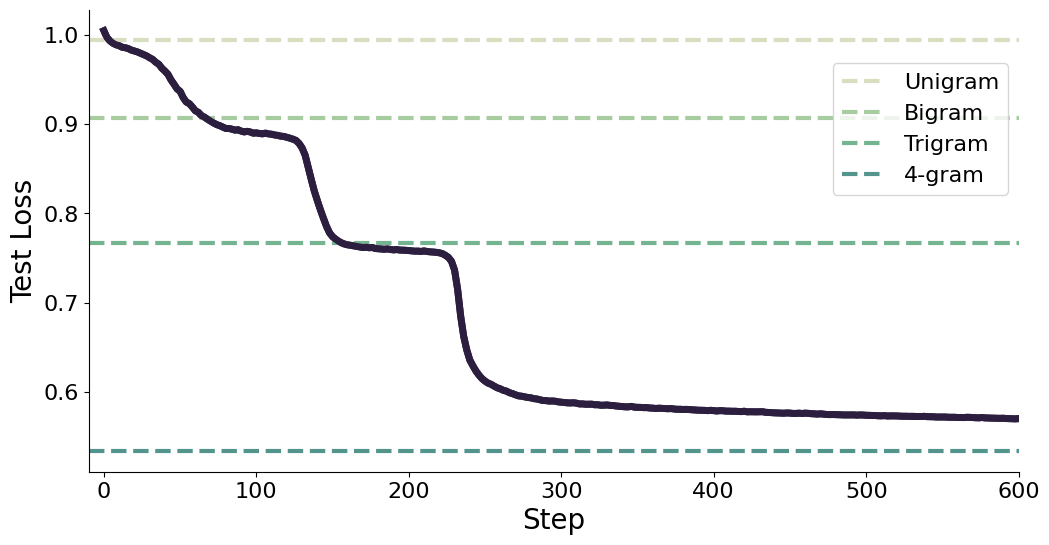

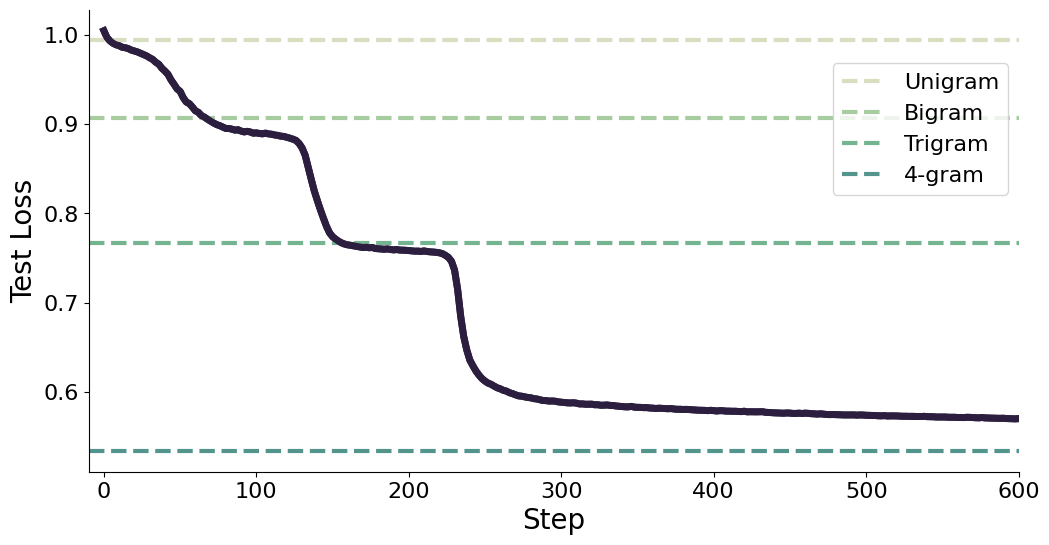

In [29]:
plot_losses(losses, bayes, save_every =2, unigram = ungiram, bigram=bigram, trigram=trigram, fontsize = 20)